In [263]:
import torch
import pandas as pd
from torchvision.datasets import MNIST
import torchvision.transforms as tfs
from sklearn.metrics import accuracy_score
from torch import FloatTensor
from torch.utils.data import DataLoader
import numpy as np
from torch.nn.functional import cross_entropy
import matplotlib.pyplot as plt

device = torch.device('cuda:0') if torch.cuda.is_available else torch.device('cpu')

df = pd.read_csv(r'/Users/aleksandrcernysov/Desktop/SimpleNN/train_distance.csv', delimiter=',')
df = df.drop('Unnamed: 0', 1)
df = df.drop('mood.name', 1)

df_test = pd.read_csv(r'/Users/aleksandrcernysov/Desktop/SimpleNN/test_distance.csv', delimiter=',')
df_test = df_test.drop('Unnamed: 0', 1)
df_test = df_test.drop('mood.name', 1)
# train_X = torch.tensor(df.iloc[:,1:68].values)
# train_y = torch.tensor(df.iloc[:,68:69].values)

train_dataset = torch.utils.data.TensorDataset(torch.from_numpy(df.iloc[:,0:68].values), torch.from_numpy(df['mood.value'].values))
test_dataset = torch.utils.data.TensorDataset(torch.from_numpy(df_test.iloc[:,0:68].values), torch.from_numpy(df_test['mood.value'].values))

features = 68
classes = 7
epochs = 10000
lr=0.03
history = []

W = torch.FloatTensor(features, classes).uniform_(-1, 1) / features**0.5
W.requires_grad_()

batch_size = 128

train_loader = DataLoader(train_dataset, batch_size=batch_size, drop_last=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, drop_last=True)


x_batch, y_batch = next(iter(train_loader))
x_batch.shape, y_batch.shape

/var/folders/8t/w_8kv55n25zdy7tz2vx3d7ww0000gn/T/ipykernel_30480/2630251241.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('Unnamed: 0', 1)
/var/folders/8t/w_8kv55n25zdy7tz2vx3d7ww0000gn/T/ipykernel_30480/2630251241.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('mood.name', 1)
/var/folders/8t/w_8kv55n25zdy7tz2vx3d7ww0000gn/T/ipykernel_30480/2630251241.py:19: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_test = df_test.drop('Unnamed: 0', 1)
/var/folders/8t/w_8kv55n25zdy7tz2vx3d7ww0000gn/T/ipykernel_30480/2630251241.py:20: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_test = df_test.drop('mood.name', 1

(torch.Size([128, 68]), torch.Size([128]))

In [264]:
for i in range(epochs):
  for x_batch, y_batch in train_loader:
    # load batches of data correctly
    x_batch = x_batch.reshape(x_batch.shape[0], -1)

    # compute loss (log loss a.k.a. cross entropy)
    logits = x_batch @ W.double()
    probabilities = torch.exp(logits) / torch.exp(logits).sum(dim=1, keepdims=True)
    
    loss = -torch.log(probabilities[range(batch_size), y_batch]).mean()
    history.append(loss.item())

    # calc gradients
    loss.backward()

    # step of gradient descent
    grad = W.grad
    with torch.no_grad():
      W -= lr * grad
    W.grad.zero_()

  if (i + 1) % 250 == 0:
    print(f'{i+1},\t loss: {history[-1]}')

250,	 loss: 1.9692286297994364
500,	 loss: 1.5584947407832437
750,	 loss: 1.3645018765770984
1000,	 loss: 1.2484050482430895
1250,	 loss: 1.1686011707027846
1500,	 loss: 1.1092620152884058
1750,	 loss: 1.0629352339829254
2000,	 loss: 1.0255337365877057
2250,	 loss: 0.9945759165825032
2500,	 loss: 0.9684563764372236
2750,	 loss: 0.9460824741871203
3000,	 loss: 0.9266782685788657
3250,	 loss: 0.9096826554812151
3500,	 loss: 0.8946730618405723
3750,	 loss: 0.881323983303911
4000,	 loss: 0.8693789321840829
4250,	 loss: 0.8586347674190522
4500,	 loss: 0.8489277423931216
4750,	 loss: 0.8401168427077383
5000,	 loss: 0.8320908399071216
5250,	 loss: 0.8247581112335634
5500,	 loss: 0.8180311118406416
5750,	 loss: 0.8118470499737307
6000,	 loss: 0.8061450925413652
6250,	 loss: 0.8008727640805653
6500,	 loss: 0.7959849008454246
6750,	 loss: 0.7914470914707032
7000,	 loss: 0.7872243981352083
7250,	 loss: 0.7832851317560809
7500,	 loss: 0.779604236556812
7750,	 loss: 0.7761589376376419
8000,	 loss: 

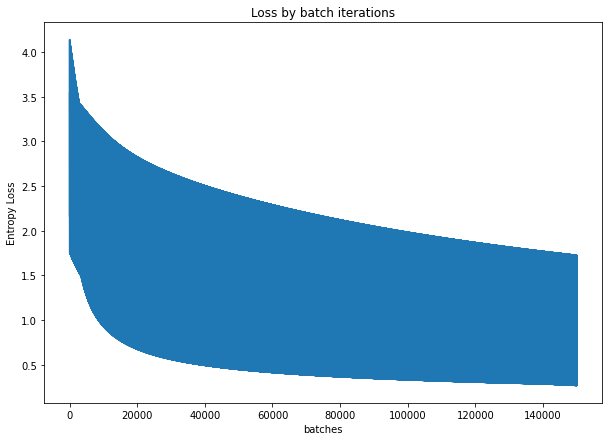

In [265]:
plt.figure(figsize=(10, 7))

plt.plot(history)

plt.title('Loss by batch iterations')
plt.ylabel('Entropy Loss')
plt.xlabel('batches')

plt.show()

In [266]:
acc = 0
batches = 0

for x_batch, y_batch in test_loader:
  # load batches of data correctly
  batches += 1
  x_batch = x_batch.view(x_batch.shape[0], -1)
  y_batch = y_batch

  preds = torch.argmax(x_batch @ W.double(), dim=1)
  acc += (preds==y_batch).cpu().numpy().mean()

print(f'Test accuracy {acc / batches:.3}')

Test accuracy 0.633


In [267]:
1e-2

0.01